In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
covid_pivot =pd.read_parquet("COVID19CovidDataPivot.parquet.gzip")
state_pivot = pd.read_parquet("COVID19StatePivot.parquet.gzip")
covid_panel =pd.read_parquet("COVID19DataForVoila.parquet.gzip")

In [2]:
plt.rcParams.update({"font.size": 30})

nd_data =covid_panel[covid_panel["state"]=="North Dakota"]

cass_data = nd_data.loc[38017]#.loc["2021-08-01":]
for key in ["Total Cases", "Total Deaths"]:
    cass_data[key + " Since August 2021"] = 0
    cass_data.loc["2021-08-01":][key + " Since August 2021"] = cass_data.loc["2021-08-01":][key].sub(cass_data.loc["2021-08-01"][key])




<ipython-input-2-6384028e0289>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cass_data[key + " Since August 2021"] = 0
<ipython-input-2-6384028e0289>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cass_data.loc["2021-08-01":][key + " Since August 2021"] = cass_data.loc["2021-08-01":][key].sub(cass_data.loc["2021-08-01"][key])


<AxesSubplot:xlabel='date'>

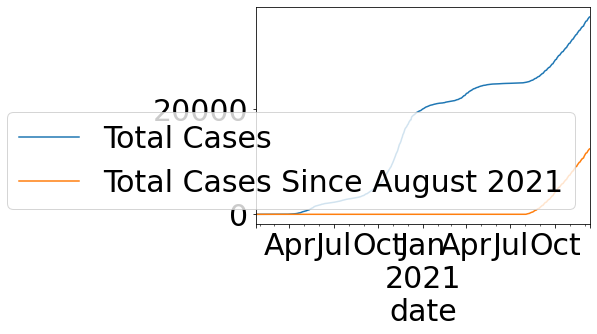

In [3]:
cass_data[["Total Cases", "Total Cases Since August 2021"]].plot()


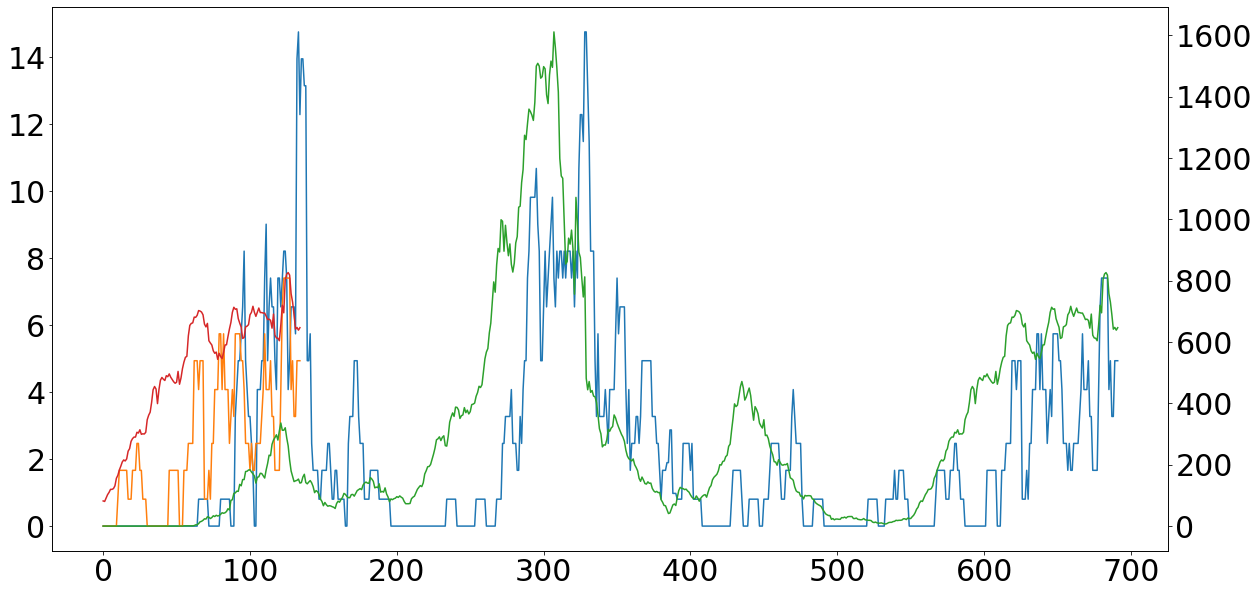

In [4]:
fig,ax = plt.subplots(figsize = (20,10))
ax.plot(np.arange(len(cass_data["Daily Deaths per Million 7 Day MA"].values)), cass_data["Daily Deaths per Million 7 Day MA"].values)
ax.plot(np.arange(len(cass_data["Daily Deaths per Million 7 Day MA"].loc["2021-08-01":].values)), cass_data["Daily Deaths per Million 7 Day MA"].loc["2021-08-01":].values)
ax2 = ax.twinx()

ax2.plot(np.arange(len(cass_data["Daily Cases per Million 7 Day MA"].values)), cass_data["Daily Cases per Million 7 Day MA"].values, color = "C2")
ax2.plot(np.arange(len(cass_data["Daily Cases per Million 7 Day MA"].loc["2021-08-01":].values)), cass_data["Daily Cases per Million 7 Day MA"].loc["2021-08-01":].values, color = "C3")


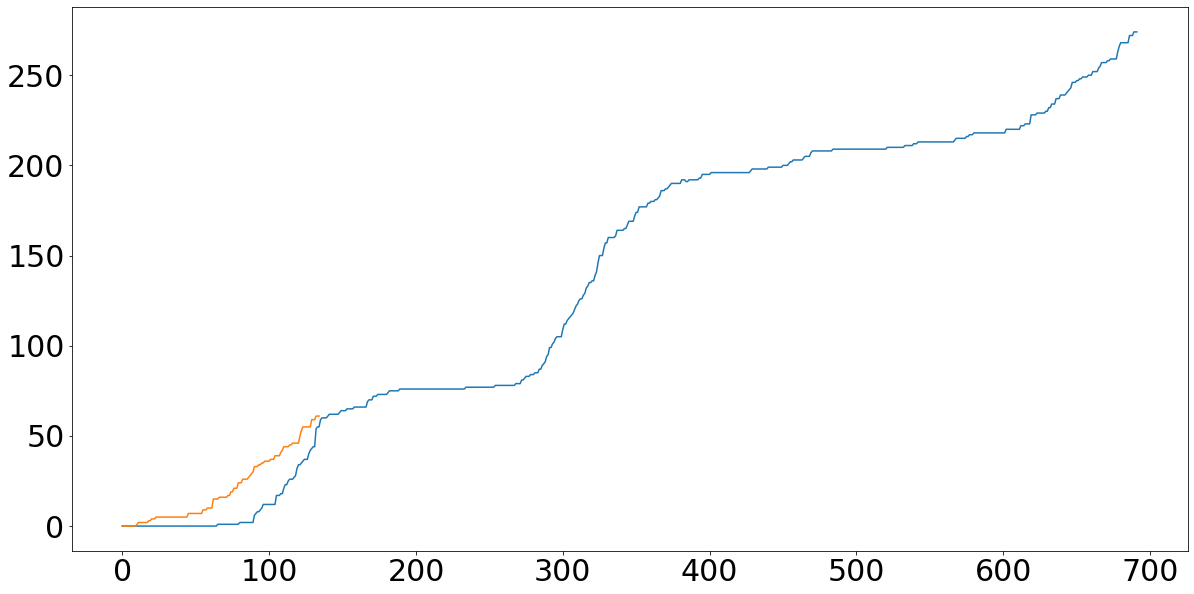

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (20,10))
ax.plot(np.arange(len(cass_data["Total Deaths"].values)), cass_data["Total Deaths"].values)
ax.plot(np.arange(len(cass_data["Total Deaths Since August 2021"].loc["2021-08-01":].values)), cass_data["Total Deaths Since August 2021"].loc["2021-08-01":].values)
# ax2 = ax.twinx()

# ax2.plot(np.arange(len(cass_data["Daily Cases per Million 7 Day MA"].values)), cass_data["Daily Cases per Million 7 Day MA"].values, color = "C2")
# ax2.plot(np.arange(len(cass_data["Daily Cases per Million 7 Day MA"].loc["2021-08-01":].values)), cass_data["Daily Cases per Million 7 Day MA"].loc["2021-08-01":].values, color = "C3")


In [6]:
cass_data["Total Cases Since August 2021"].div(cass_data.iloc[0]["total_population"])


date
2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000000
2020-01-25    0.000000
2020-01-26    0.000000
                ...   
2021-12-09    0.069506
2021-12-10    0.070160
2021-12-11    0.070969
2021-12-12    0.071205
2021-12-13    0.071434
Name: Total Cases Since August 2021, Length: 692, dtype: float64

Text(0.5, 1.0, 'Cass County')

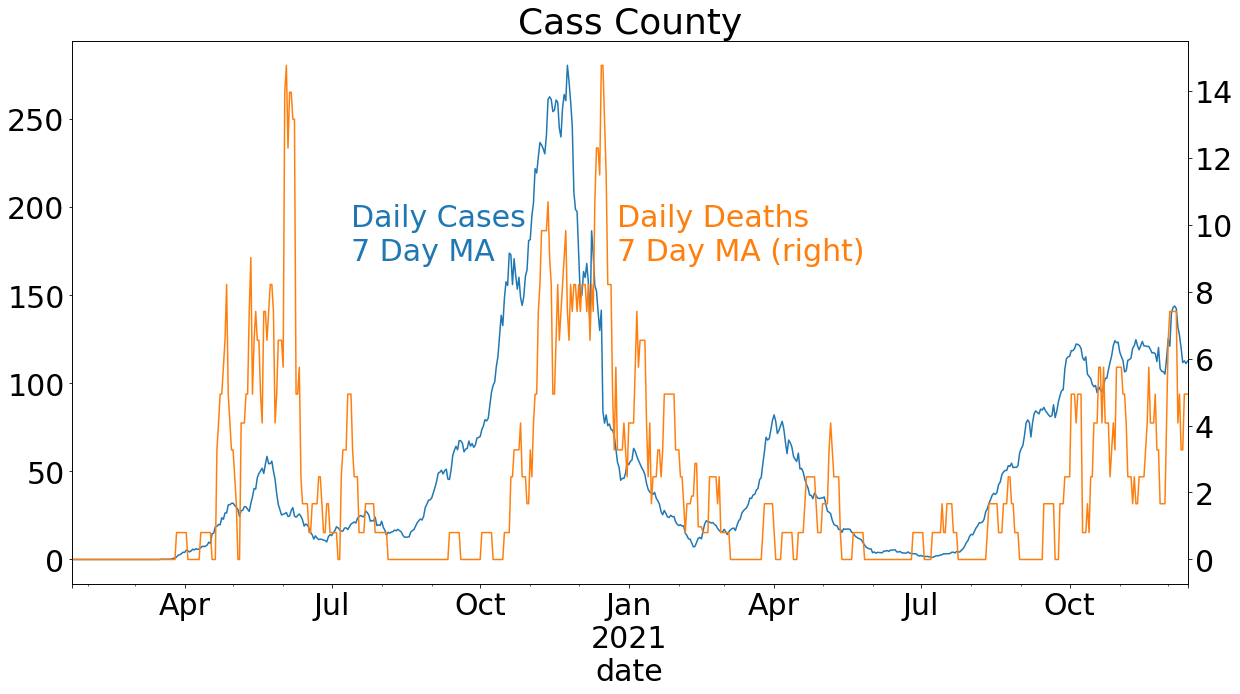

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
plot_keys = ["Daily Cases 7 Day MA", "Daily Deaths per Million 7 Day MA"]
cass_data[plot_keys].plot(secondary_y = "Daily Deaths per Million 7 Day MA", 
                          legend = False,
                          ax = ax)
ax.text("2020-07-13", 170, "Daily Cases\n7 Day MA", color = "C0")
ax.text("2020-12-25", 170, "Daily Deaths\n7 Day MA (right)", color = "C1")
ax.set_title("Cass County")

In [8]:
nd_data.keys()

Index(['Total Cases', 'Total Deaths', 'Cases per Million',
       'Deaths per Million', 'Daily Cases', 'Daily Deaths',
       'Daily Cases 7 Day MA', 'Daily Deaths 7 Day MA',
       'Daily Cases per Million 7 Day MA', 'Daily Deaths per Million 7 Day MA',
       'total_population', 'state'],
      dtype='object')